# Problem Statement
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. 

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

### Import basic libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

#### Load dataset

In [2]:
data=pd.read_excel("flight-fareData\Flight_Fare.xlsx")

In [3]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### Basic Checks

In [4]:
# shape
data.shape

(10683, 11)

In [5]:
# print all columns
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
# dtypes
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
# head
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
# tail
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [12]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [13]:
# describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [14]:
data.describe(include='O')


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


# Insights
* There are a total of 10,683 data records in this dataset that contain information about flight prices.

* The mean or average price of the flights in this dataset is approximately 9,087.06.(the central tendency of the prices in the dataset)

* The standard deviation is approximately 4,611.36. (spread of the prices around the mean). A higher standard deviation indicates greater variability in prices.

* The minimum price in the dataset is 1,759 ==> lowest recorded price 


In [16]:
# Check for missing values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Exploratory Data Analysis

### univariate analysis
* Analysing single variable/column/feature
* check the distribution of each column

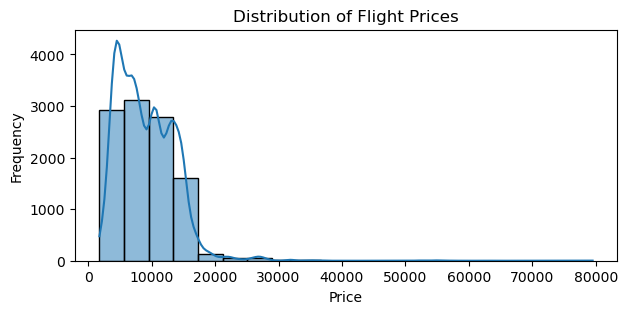

In [17]:
# Check distribution of Price
# Plot the distribution of prices using a histogram
df = pd.DataFrame(data)
plt.figure(figsize=(7, 3))
sns.histplot(data=df, x='Price', bins=20, kde=True)  
# Adjust the number of bins as needed
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.show()

# Insights 
* Price representing skewness/not normal.

# Data Exploration:

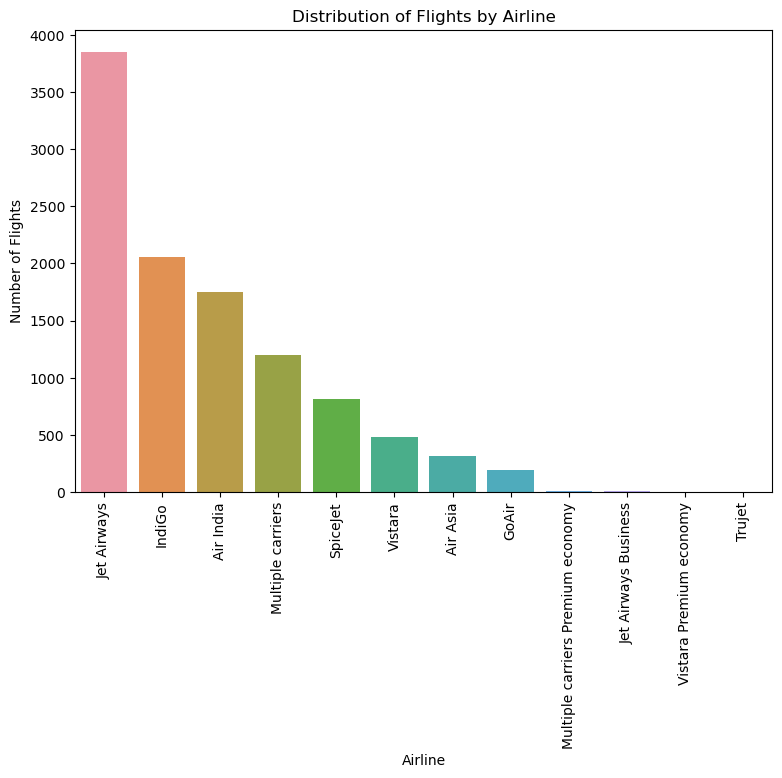

In [19]:
# Plot the distribution of flights by airline
plt.figure(figsize=(9, 6))
sns.countplot(data=df, x='Airline', order=df['Airline'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flights by Airline')
plt.show()

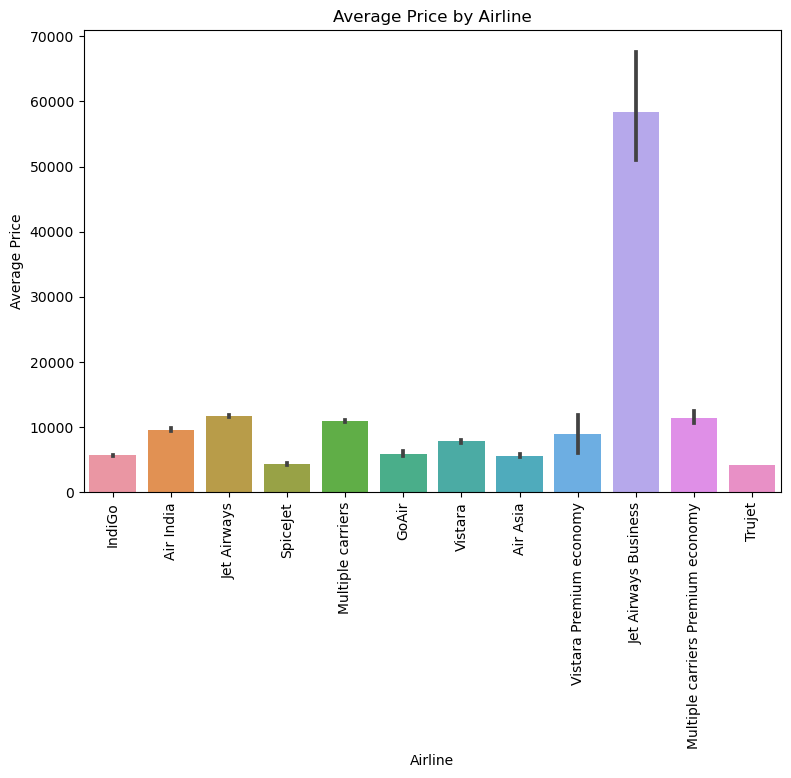

In [21]:
# Plot the distribution of Price by Airline
plt.figure(figsize=(9, 6))
sns.barplot(x='Airline', y='Price', data=df)
plt.title('Average Price by Airline')
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

# Insights 
* Jet Airways Business have the hignest average of price and the hignest number of flights

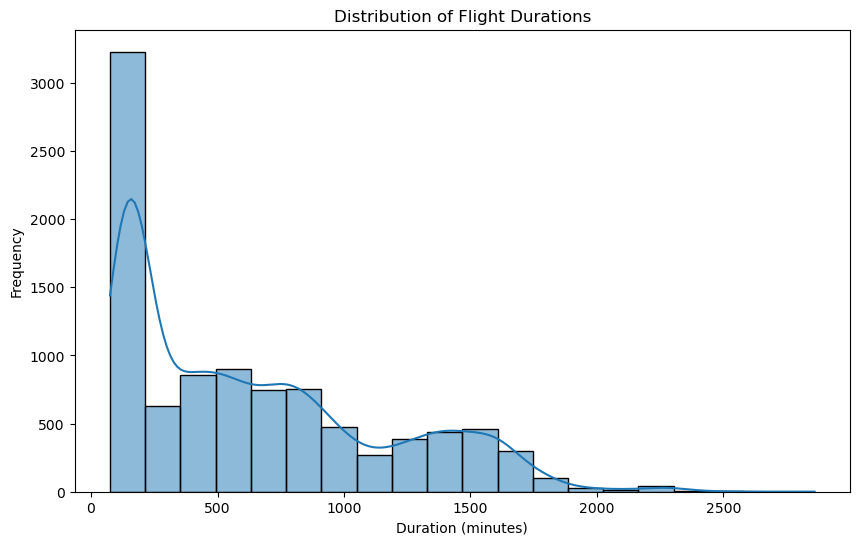

In [27]:
# Extract hours and minutes from the 'Duration' column
df['Duration_hours'] = df['Duration'].str.extract('(\d+)h').astype(float)
df['Duration_minutes'] = df['Duration'].str.extract('(\d+)m').astype(float)

# Calculate total duration in minutes
df['Total_Duration_minutes'] = df['Duration_hours'] * 60 + df['Duration_minutes']

# Plot the distribution of flight durations using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total_Duration_minutes', bins=20, kde=True)  # Adjust the number of bins as needed
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Durations')
plt.show()

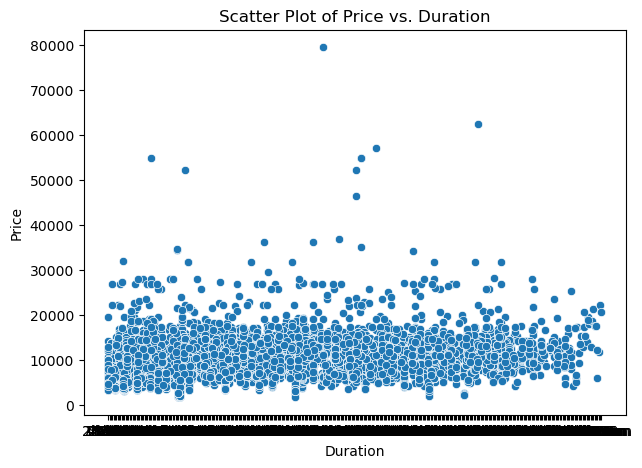

In [18]:
# Scatter plot of Price vs. Duration
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Duration', y='Price', data=df)
plt.title('Scatter Plot of Price vs. Duration')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()



In [ ]:
# How many stops are common for flights?

In [ ]:
# What is the most common Additional_Info value?

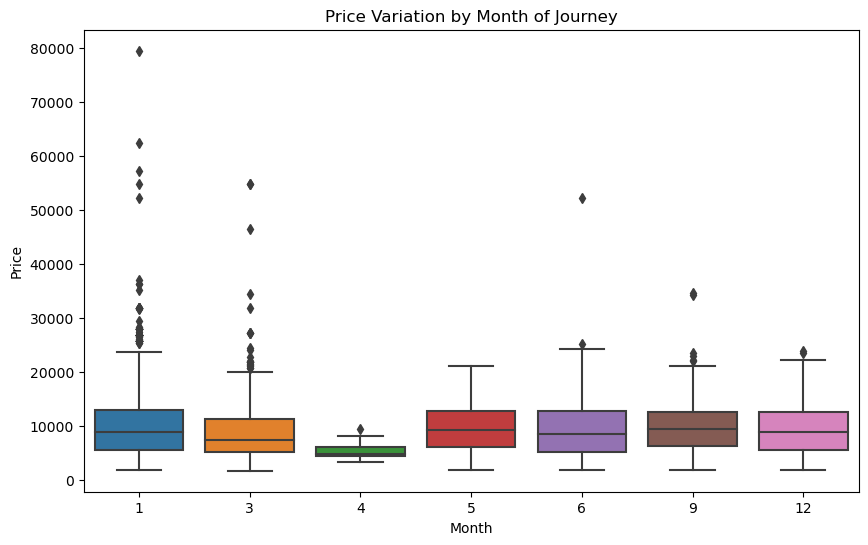

Price            1.0000
Journey_Month    0.0107
Name: Price, dtype: float64


In [19]:
# 4. Date Analysis
# Convert 'Date_of_Journey' to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
# Extract month from 'Date_of_Journey'
df['Journey_Month'] = df['Date_of_Journey'].dt.month
# Box plot of Price by Month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Journey_Month', y='Price', data=df)
plt.title('Price Variation by Month of Journey')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

# 5. Correlation Analysis
corr_matrix = df.corr()
print(corr_matrix['Price'])

In [ ]:
import sweetviz as sv#importing sweetviz library 
my_report = sv.analyze(data)#syntax to use sweetviz
my_report.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

# Data Preprocessing

In [71]:
# check for missing values and handle them
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [74]:
# number of rows with missing "Route" and "Total_Stops" values is relatively small compared to your dataset's size
#and removing them doesn't significantly impact the quality of your data==> i will drop these rows.

In [75]:
data.dropna(subset=['Route'], inplace=True)


In [76]:
data.dropna(subset=['Total_Stops'], inplace=True)


In [77]:
# Re check for missing values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# check for duplicates and handling them

In [78]:
data.duplicated().sum()

220

In [79]:
#Remove Duplicate Rows
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [30]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# Check for outliers

<Axes: xlabel='Price'>

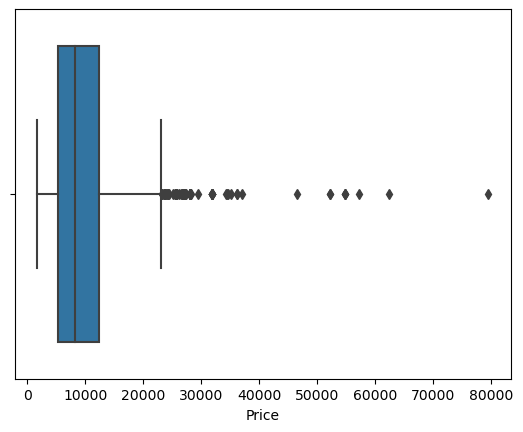

In [80]:
# check outliers in price
sns.boxplot(x=data.Price)

* We can see many outliers in Price column
* outliers in Price are seen toward right side

In [24]:
#How to find those outliers
# IQR- Use this method when data is not normal
# 3-sigma rule - use this method when data is normal

In [81]:
# find Q1 and Q3
Q1=data['Price'].quantile(0.25)
print("lower quartile",Q1)
Q3=data['Price'].quantile(0.75)
print("upper quartile",Q3)


lower quartile 5224.0
upper quartile 12344.75


In [82]:
# find IQR
IQR=Q3-Q1
IQR

7120.75

In [83]:
# find lower limit and upper limit
lower_limit=Q1-1.5*IQR
print("lower limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower limit is -5457.125
upper_limit is 23025.875


In [84]:
# find values above upper_limit
data.loc[data['Price']>upper_limit]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


In [85]:
len(data.loc[data['Price']>upper_limit])/len(data)

0.008984897725100364

In [86]:
# find values below lower limit
data.loc[data['Price']<lower_limit]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [87]:
# How to handle outliers
# since data is not normal will replace outliers with median
data.loc[data['Price']>upper_limit,"Price"]=data["Price"].median()

<Axes: xlabel='Price'>

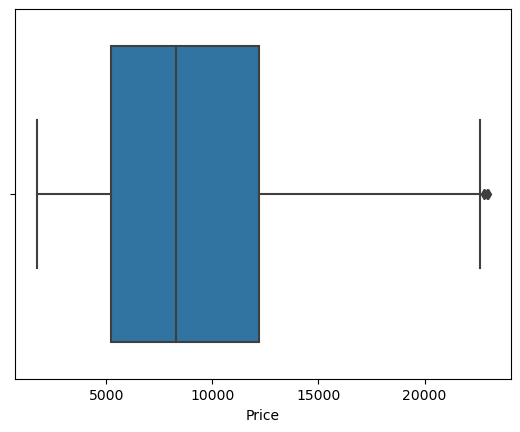

In [88]:
# check are there any outliers in Price
sns.boxplot(x=data.Price)

In [38]:
# Data Processing

In [94]:
from sklearn.preprocessing import LabelEncoder

# Data preprocessing
# 'Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'
# Encode categorical variables
label_encoders = {}
categorical_cols = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# 'Duration'
# Convert Duration to total minutes
data['Duration_hours'] = data['Duration'].str.extract(r'(\d+)h').astype(float).fillna(0)
data['Duration_minutes'] = data['Duration'].str.extract(r'(\d+)m').astype(float).fillna(0)
data['Duration_total_minutes'] = data['Duration_hours'] * 60 + data['Duration_minutes']
# 'Date_of_Journey'
# Parse Date_of_Journey column and extract features (day, month, year)
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month
data['Journey_year'] = data['Date_of_Journey'].dt.year

# 'Dep_Time'
# Extract hours and minutes from Dep_Time
data['Dep_Hours'] = data['Dep_Time'].str.extract(r'(\d+):(\d+)')[0].astype(int)
data['Dep_Minutes'] = data['Dep_Time'].str.extract(r'(\d+):(\d+)')[1].astype(int)

# Convert Dep_Time to minutes since midnight
data['Dep_Minutes_Since_Midnight'] = data['Dep_Hours'] * 60 + data['Dep_Minutes']


# 'Arrival_Time'
# Extract time of arrival (if available)
data['Arrival_Time'] = data['Arrival_Time'].str.extract(r'(\d+:\d+)')
# Extract day and month (if available)
data['Arrival_Day'] = data['Arrival_Time'].str.extract(r'(\d+) (\w{3})')[0]
data['Arrival_Month'] = data['Arrival_Time'].str.extract(r'(\d+) (\w{3})')[1]


In [95]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Duration_minutes,Duration_total_minutes,Journey_day,Journey_month,Journey_year,Dep_Hours,Dep_Minutes,Dep_Minutes_Since_Midnight,Arrival_Day,Arrival_Month
0,3,2019-03-24,0,5,BLR → DEL,22:20,01:10,2h 50m,4,8,...,50.0,170.0,24,3,2019,22,20,1340,NaN,NaN
1,1,2019-05-01,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,1,8,...,25.0,445.0,1,5,2019,5,50,350,NaN,NaN
2,4,2019-06-09,2,1,DEL → LKO → BOM → COK,09:25,04:25,19h,1,8,...,0.0,1140.0,9,6,2019,9,25,565,NaN,NaN
3,3,2019-05-12,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,0,8,...,25.0,325.0,12,5,2019,18,5,1085,NaN,NaN
4,3,2019-03-01,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,0,8,...,45.0,285.0,1,3,2019,16,50,1010,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2019-04-09,3,0,CCU → BLR,19:55,22:25,2h 30m,4,8,...,30.0,150.0,9,4,2019,19,55,1195,NaN,NaN
10679,1,2019-04-27,3,0,CCU → BLR,20:45,23:20,2h 35m,4,8,...,35.0,155.0,27,4,2019,20,45,1245,NaN,NaN
10680,4,2019-04-27,0,2,BLR → DEL,08:20,11:20,3h,4,8,...,0.0,180.0,27,4,2019,8,20,500,NaN,NaN
10681,10,2019-03-01,0,5,BLR → DEL,11:30,14:10,2h 40m,4,8,...,40.0,160.0,1,3,2019,11,30,690,NaN,NaN


In [96]:
data.isnull().sum()

Airline                           0
Date_of_Journey                   0
Source                            0
Destination                       0
Route                             0
Dep_Time                          0
Arrival_Time                      0
Duration                          0
Total_Stops                       0
Additional_Info                   0
Price                             0
Duration_hours                    0
Duration_minutes                  0
Duration_total_minutes            0
Journey_day                       0
Journey_month                     0
Journey_year                      0
Dep_Hours                         0
Dep_Minutes                       0
Dep_Minutes_Since_Midnight        0
Arrival_Day                   10462
Arrival_Month                 10462
dtype: int64

In [108]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_hours,Duration_minutes,Duration_total_minutes,Journey_day,Journey_month,Journey_year,Dep_Hours,Dep_Minutes,Dep_Minutes_Since_Midnight
0,3,2019-03-24,0,5,BLR → DEL,22:20,01:10,2h 50m,4,8,3897,2.0,50.0,170.0,24,3,2019,22,20,1340
1,1,2019-05-01,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,1,8,7662,7.0,25.0,445.0,1,5,2019,5,50,350
2,4,2019-06-09,2,1,DEL → LKO → BOM → COK,09:25,04:25,19h,1,8,13882,19.0,0.0,1140.0,9,6,2019,9,25,565
3,3,2019-05-12,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,0,8,6218,5.0,25.0,325.0,12,5,2019,18,5,1085
4,3,2019-03-01,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,0,8,13302,4.0,45.0,285.0,1,3,2019,16,50,1010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2019-04-09,3,0,CCU → BLR,19:55,22:25,2h 30m,4,8,4107,2.0,30.0,150.0,9,4,2019,19,55,1195
10679,1,2019-04-27,3,0,CCU → BLR,20:45,23:20,2h 35m,4,8,4145,2.0,35.0,155.0,27,4,2019,20,45,1245
10680,4,2019-04-27,0,2,BLR → DEL,08:20,11:20,3h,4,8,7229,3.0,0.0,180.0,27,4,2019,8,20,500
10681,10,2019-03-01,0,5,BLR → DEL,11:30,14:10,2h 40m,4,8,12648,2.0,40.0,160.0,1,3,2019,11,30,690


In [106]:
# drope 2 colums with no value because we find this info on date time
data.drop(columns=['Arrival_Day', 'Arrival_Month'], inplace=True)


KeyError: "['Arrival_Day', 'Arrival_Month'] not found in axis"

In [109]:
data.drop(columns=['Date_of_Journey', 'Arrival_Time', 'Dep_Time'], inplace=True)


In [110]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Duration_hours,Duration_minutes,Duration_total_minutes,Journey_day,Journey_month,Journey_year,Dep_Hours,Dep_Minutes,Dep_Minutes_Since_Midnight
0,3,0,5,BLR → DEL,2h 50m,4,8,3897,2.0,50.0,170.0,24,3,2019,22,20,1340
1,1,3,0,CCU → IXR → BBI → BLR,7h 25m,1,8,7662,7.0,25.0,445.0,1,5,2019,5,50,350
2,4,2,1,DEL → LKO → BOM → COK,19h,1,8,13882,19.0,0.0,1140.0,9,6,2019,9,25,565
3,3,3,0,CCU → NAG → BLR,5h 25m,0,8,6218,5.0,25.0,325.0,12,5,2019,18,5,1085
4,3,0,5,BLR → NAG → DEL,4h 45m,0,8,13302,4.0,45.0,285.0,1,3,2019,16,50,1010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,CCU → BLR,2h 30m,4,8,4107,2.0,30.0,150.0,9,4,2019,19,55,1195
10679,1,3,0,CCU → BLR,2h 35m,4,8,4145,2.0,35.0,155.0,27,4,2019,20,45,1245
10680,4,0,2,BLR → DEL,3h,4,8,7229,3.0,0.0,180.0,27,4,2019,8,20,500
10681,10,0,5,BLR → DEL,2h 40m,4,8,12648,2.0,40.0,160.0,1,3,2019,11,30,690


In [111]:
data.drop(columns=['Route'], inplace=True)


In [114]:
data

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Duration_hours,Duration_minutes,Duration_total_minutes,Journey_day,Journey_month,Journey_year,Dep_Hours,Dep_Minutes,Dep_Minutes_Since_Midnight
0,3,0,5,2h 50m,4,8,3897,2.0,50.0,170.0,24,3,2019,22,20,1340
1,1,3,0,7h 25m,1,8,7662,7.0,25.0,445.0,1,5,2019,5,50,350
2,4,2,1,19h,1,8,13882,19.0,0.0,1140.0,9,6,2019,9,25,565
3,3,3,0,5h 25m,0,8,6218,5.0,25.0,325.0,12,5,2019,18,5,1085
4,3,0,5,4h 45m,0,8,13302,4.0,45.0,285.0,1,3,2019,16,50,1010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,2h 30m,4,8,4107,2.0,30.0,150.0,9,4,2019,19,55,1195
10679,1,3,0,2h 35m,4,8,4145,2.0,35.0,155.0,27,4,2019,20,45,1245
10680,4,0,2,3h,4,8,7229,3.0,0.0,180.0,27,4,2019,8,20,500
10681,10,0,5,2h 40m,4,8,12648,2.0,40.0,160.0,1,3,2019,11,30,690


In [115]:
data.drop(columns=['Duration'], inplace=True)


# Feature Engineering

In [46]:
# drop irrelevant columns
# Selecting best features
* Drop the columns which has very less correlation with target variables.
* Drop one of the column if two input variables has high correlation

SyntaxError: invalid syntax (1293416798.py, line 3)

In [54]:
data.corr()

,Price,Airline_encoded,Source_encoded,Destination_encoded,Total_Stops_encoded,Duration_hours,Duration_minutes,Duration_total_minutes,Journey_day,Journey_month,Journey_year
Price,1.000000,-0.045113,0.075880,-0.169741,-0.618765,0.572921,-0.121675,0.578755,-0.116036,-0.048720,NaN
Airline_encoded,-0.045113,1.000000,-0.013401,0.018479,0.035732,-0.158450,-0.026067,-0.165009,0.026238,0.024643,NaN
Source_encoded,0.075880,-0.013401,1.000000,-0.592574,-0.225557,0.166340,-0.250334,0.130829,0.004898,0.183268,NaN
Destination_encoded,-0.169741,0.018479,-0.592574,1.000000,0.337756,-0.258371,0.061013,-0.254624,-0.040998,-0.364686,NaN
Total_Stops_encoded,-0.618765,0.035732,-0.225557,0.337756,1.000000,-0.605760,0.192074,-0.615799,0.029056,-0.026278,NaN
Duration_hours,0.572921,-0.158450,0.166340,-0.258371,-0.605760,1.000000,-0.127820,0.999577,-0.022283,0.016012,NaN
Duration_minutes,-0.121675,-0.026067,-0.250334,0.061013,0.192074,-0.127820,1.000000,-0.098910,0.001450,-0.010864,NaN
Duration_total_minutes,0.578755,-0.165009,0.130829,-0.254624,-0.615799,0.999577,-0.098910,1.000000,-0.023548,0.010831,NaN
Journey_day,-0.116036,0.026238,0.004898,-0.040998,0.029056,-0.022283,0.001450,-0.023548,1.000000,-0.038378,NaN
Journey_month,-0.048720,0.024643,0.183268,-0.364686,-0.026278,0.016012,-0.010864,0.010831,-0.038378,1.000000,NaN


<Axes: >

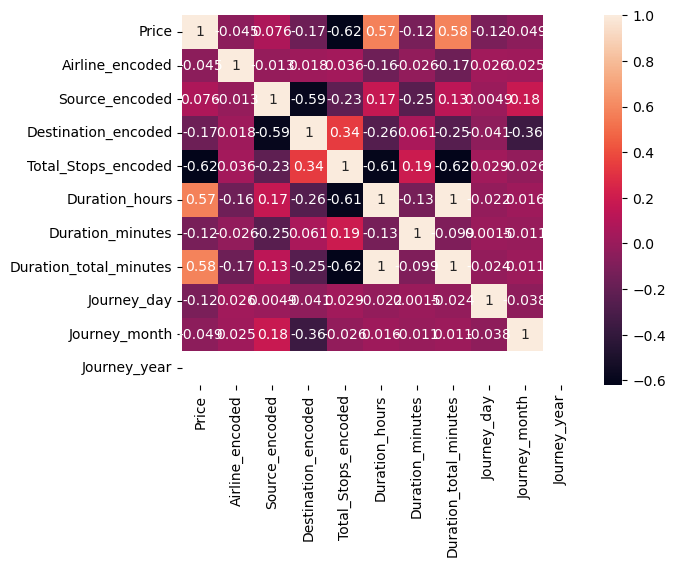

In [55]:
sns.heatmap(data.corr(),annot=True)
# annot=True is used for labelling the corr values
# In this Newspaper has very less correlation with sales, since dataset is small we are not dropping Newspaper.

<Axes: >

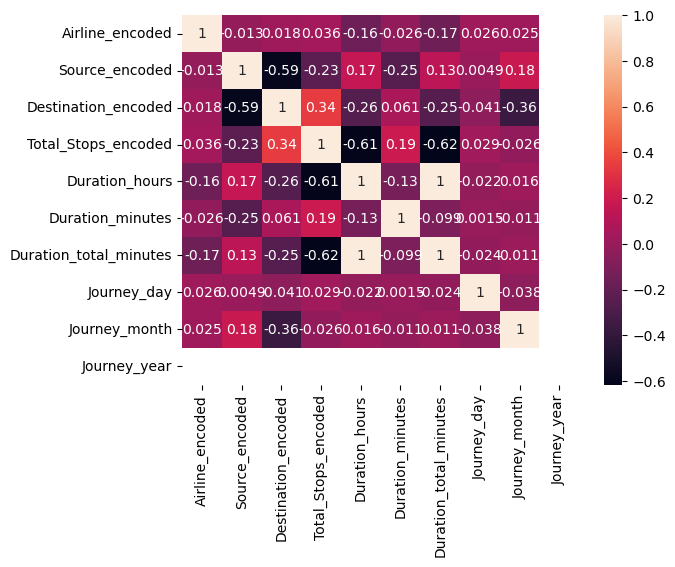

In [57]:
# check for multicollinearity- there shoud not be any high correlation among input variables
sns.heatmap(data.drop("Price",axis=1).corr(),annot=True)

### Split data into x and y

In [143]:
x=data.drop("Price",axis=1)
y=data['Price']

### Split data for training and testing

# Sklearn
It is one of the scientific library which includes all the packages related to Machine learning, data cleaning and feature engineering

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [145]:
X_train.shape

(7323, 14)

In [146]:
X_test.shape

(3139, 14)

# Model Building LinearRegression

In [148]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression
# initialise model
model=LinearRegression()
# Train model with x_train and y-train
model.fit(X_train,y_train)

LinearRegression()

In [149]:
# make predictions /test model
y_pred=model.predict(X_test)
y_pred

array([ 5336.09123976,  5744.89215308,  4807.14441061, ...,
       11287.86458097, 12553.01990776, 10358.53090152])

In [150]:
y_test

6572     5747
9438     6094
1680     4384
8653    11467
6999     4030
        ...  
4702    12080
3582     2017
5589    14714
8052    10539
2558     8099
Name: Price, Length: 3139, dtype: int64

In [151]:
# slopes/coefficients of x
model.coef_

array([ 5.14870776e+01, -2.48790517e+02, -2.44634356e+01, -1.01494392e+03,
        2.75245540e+02,  2.31034705e-01, -1.13687143e+01,  2.49336799e+00,
       -4.88869412e+01, -2.07021997e+02,  0.00000000e+00,  1.33581598e-01,
       -7.58379778e+00,  4.31098118e-01])

In [152]:
# intercept
model.intercept_

8806.38846458618

# Evaluate the model

In [153]:
# Loss functions to know the difference between actual and predicted values.
# Different Error/Loss functions in Regression algorithm are
* MSE(Mean Squared error)
* MAE(Mean absolute error)
* RMSE(Root mean squared error)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2284453625.py, line 3)

In [154]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [155]:
# MSE
MSE=mean_squared_error(y_test,y_pred)
MSE

8654539.225339165

In [156]:
# MAE
MAE=mean_absolute_error(y_test,y_pred)
MAE


2308.3299202719318

In [157]:
# RMSE
rmse=np.sqrt(MSE)
rmse

2941.859824216505

In [158]:
# r2_score
r2_score(y_test,y_pred)

0.4643094000432816

In [159]:
# 0.47 BAD model

In [160]:
# adjusted R2 score

In [161]:
data.shape

(10462, 15)

In [162]:
adj_r2=1-(1-0.47538303874580135)*(10462-1)/(10462-15-1)
adj_r2

0.47462971169058277

# trying RandomForestRegressor

In [133]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [134]:
y_pred = reg_rf.predict(X_test)

In [135]:
reg_rf.score(X_train, y_train)

0.9818413171185048

In [136]:
reg_rf.score(X_test, y_test)

0.8820660134312406

# GradientBoostingRegressor

In [164]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

# Optionally, you can visualize the feature importances
feature_importances = gb_regressor.feature_importances_
# Assign feature_importances to your feature columns for interpretation






Mean Absolute Error (MAE): 1264.938717198876
Mean Squared Error (MSE): 3253219.4413807746
Root Mean Squared Error (RMSE): 1803.668329095118
R-squared (R2) Score: 0.7986352561391469


# SVR

In [165]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Standardize the features (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr_regressor.predict(X_test_scaled)

# Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 3195.3220525553957
Mean Squared Error (MSE): 15279283.41444659
Root Mean Squared Error (RMSE): 3908.872396797648
R-squared (R2) Score: 0.05425716077069764


# neural network model for regression

In [167]:
pip install tensorflow


     ------------------------------------ 276.5/276.5 MB 628.3 kB/s eta 0:00:00
     -------------------------------------- 430.5/430.5 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 708.3 kB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.7 MB/s eta 0:00:00
     -------------------------------------- 440.8/440.8 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 849.2 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 976.6 kB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 629.1 kB/s eta 0:00:00
     -------------------------------------- 24.4/24.4 MB 701.2 kB/s eta 0:00:00
     ------------------------------------ 181.4/181.4 kB 915.1 kB/s eta 0:00:00
     ------------------------------------

In [168]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron (regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Epoch 1/50
229/229 [==============================] - 3s 3ms/step - loss: 90052888.0000
Epoch 2/50
229/229 [==============================] - 1s 3ms/step - loss: 49676692.0000
Epoch 3/50
229/229 [==============================] - 1s 3ms/step - loss: 16995746.0000
Epoch 4/50
229/229 [==============================] - 1s 3ms/step - loss: 11555979.0000
Epoch 5/50
229/229 [==============================] - 1s 3ms/step - loss: 10509871.0000
Epoch 6/50
229/229 [==============================] - 1s 3ms/step - loss: 10066309.0000
Epoch 7/50
229/229 [==============================] - 1s 3ms/step - loss: 9767275.0000
Epoch 8/50
229/229 [==============================] - 1s 3ms/step - loss: 9532493.0000
Epoch 9/50
229/229 [==============================] - 1s 3ms/step - loss: 9321364.0000
Epoch 10/50
229/229 [==============================] - 1s 3ms/step - loss: 9141161.0000
Epoch 11/50
229/229 [==============================] - 1s 3ms/step - loss: 8974589.0000
Epoch 12/50
229/229 [==============

# Lasso regression , Ridge regression

In [169]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Standardize the features (important for Lasso and Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression
lasso_regressor = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
lasso_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set for Lasso
y_pred_lasso = lasso_regressor.predict(X_test_scaled)

# Ridge Regression
ridge_regressor = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set for Ridge
y_pred_ridge = ridge_regressor.predict(X_test_scaled)

# Evaluate Lasso Regression
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Evaluate Ridge Regression
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Lasso Regression:")
print("Mean Absolute Error (MAE):", mae_lasso)
print("Mean Squared Error (MSE):", mse_lasso)
print("Root Mean Squared Error (RMSE):", rmse_lasso)
print("R-squared (R2) Score:", r2_lasso)

print("\nRidge Regression:")
print("Mean Absolute Error (MAE):", mae_ridge)
print("Mean Squared Error (MSE):", mse_ridge)
print("Root Mean Squared Error (RMSE):", rmse_ridge)
print("R-squared (R2) Score:", r2_ridge)

Lasso Regression:
Mean Absolute Error (MAE): 2308.27071884287
Mean Squared Error (MSE): 8653907.376242436
Root Mean Squared Error (RMSE): 2941.7524328608
R-squared (R2) Score: 0.46434850964956986

Ridge Regression:
Mean Absolute Error (MAE): 2308.3322209734933
Mean Squared Error (MSE): 8654503.93778263
Root Mean Squared Error (RMSE): 2941.853826719239
R-squared (R2) Score: 0.4643115842395559
